In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler

In [11]:
import pandas as pd
dataset = pd.read_csv("Social_data.csv")
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

In [12]:

dataset.columns


Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [13]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [15]:
#convert gender to numeric
dataset['Gender'] = dataset['Gender'].map({'Male':0, 'Female':1})


In [16]:
x=dataset[['Gender', 'Age', 'EstimatedSalary']]   #independent/inps
y=dataset['Purchased'] #target


In [17]:

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [18]:

#feature scaling
scaler=StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [20]:

lr=LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [21]:

y_pred = lr.predict(x_test)  #make predictions

In [22]:

#evaluation

#confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n", cm)

TN, FP, FN, TP = cm.ravel()

#metrics
accuracy = accuracy_score(y_test, y_pred)
error_rate = 1-accuracy
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)


Confusion Matrix: 
 [[50  2]
 [ 7 21]]


In [23]:
print(f"True Positives (TP): {TP}")
print(f"False Positives (FP): {FP}")
print(f"True Negatives (TN): {TN}")
print(f"False Negatives (FN): {FN}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Error Rate: {error_rate:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")



True Positives (TP): 21
False Positives (FP): 2
True Negatives (TN): 50
False Negatives (FN): 7
Accuracy: 0.89
Error Rate: 0.11
Precision: 0.91
Recall: 0.75


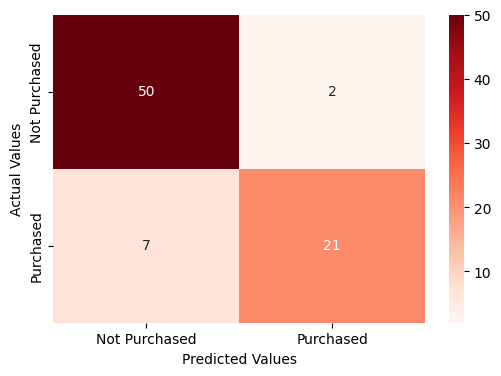

In [25]:
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=['Not Purchased','Purchased'], cmap='Reds',yticklabels=['Not Purchased','Purchased'])
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()
